In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

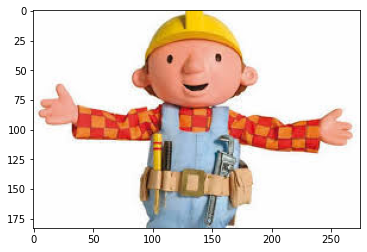

In [2]:
img= cv2.imread("bob.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")

In [4]:
img.shape

(600, 394, 3)

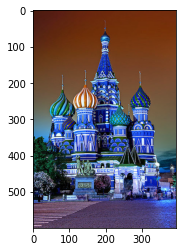

In [5]:
plt.imshow(img)
plt.show()

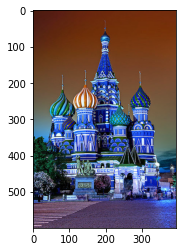

In [6]:
plt.imshow(img)
plt.show()

In [7]:
img.shape

(600, 394, 3)

In [8]:
all_pixels=img.reshape((-1,3))

In [9]:
all_pixels.shape

(236400, 3)

In [10]:
all_pixels.shape

(236400, 3)

In [11]:
from sklearn.cluster import KMeans

In [12]:
k=9
km=KMeans(n_clusters=k)

In [13]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [14]:
km.cluster_centers_

array([[ 54.10408176, 109.97529626, 225.71089096],
       [109.20161465,  50.23573866,  18.1015231 ],
       [ 64.25908006,  63.63708793,  97.55183537],
       [217.57586705, 232.94878974, 241.81557081],
       [115.70745261,  84.000609  ,  55.001015  ],
       [ 13.189598  ,  23.65212998,  28.9462532 ],
       [ 18.17115903,  41.57043552, 172.40445453],
       [103.65540077, 111.45335034, 131.41140979],
       [143.69518129, 168.41186627, 211.1708523 ]])

In [15]:
centers=np.array(km.cluster_centers_,dtype="uint")
#uint8 to represent number btw 0-255 8 bit integer is sufficient 

In [16]:
centers 

array([[ 54, 109, 225],
       [109,  50,  18],
       [ 64,  63,  97],
       [217, 232, 241],
       [115,  84,  55],
       [ 13,  23,  28],
       [ 18,  41, 172],
       [103, 111, 131],
       [143, 168, 211]], dtype=uint32)

### plot all these color ( data centres)

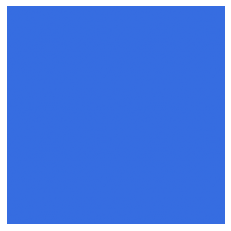

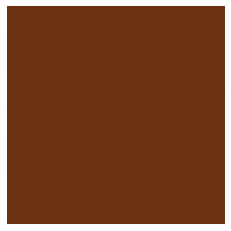

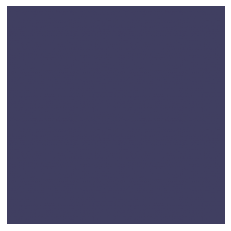

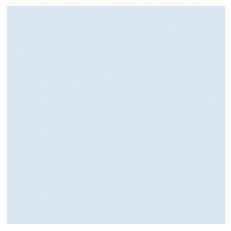

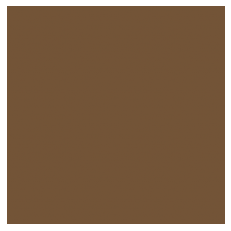

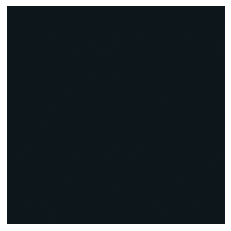

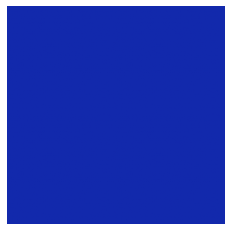

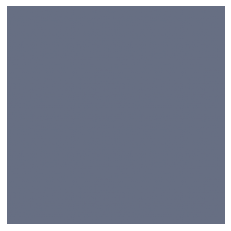

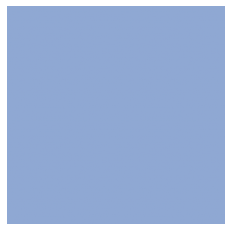

In [17]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [18]:
km.labels_

array([1, 1, 1, ..., 0, 2, 2])

In [19]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [20]:
new_img.shape


(236400, 3)

In [21]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]): #pic colors from centre and map it according to labels
    new_img[ix] = centers[km.labels_[ix]]

or we can do it like this by using plt.figure and creating list of all colors

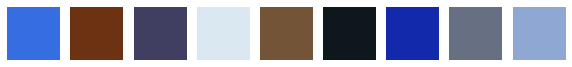

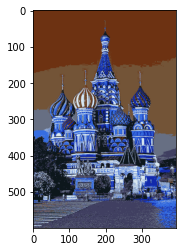

In [22]:
i= 1

plt.figure(0,figsize=(10,2)) #fig size


colors = []

for each_col in centers:
    plt.subplot(1,len(centers),i) # 1 row 9 col
    plt.axis("off")
    i+=1 #everytime we go to next box we increment it!
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()

In [23]:
new_img


array([[[109,  50,  18],
        [109,  50,  18],
        [109,  50,  18],
        ...,
        [109,  50,  18],
        [109,  50,  18],
        [109,  50,  18]],

       [[109,  50,  18],
        [109,  50,  18],
        [109,  50,  18],
        ...,
        [109,  50,  18],
        [109,  50,  18],
        [109,  50,  18]],

       [[109,  50,  18],
        [109,  50,  18],
        [109,  50,  18],
        ...,
        [109,  50,  18],
        [109,  50,  18],
        [109,  50,  18]],

       ...,

       [[ 64,  63,  97],
        [ 64,  63,  97],
        [115,  84,  55],
        ...,
        [ 54, 109, 225],
        [ 54, 109, 225],
        [ 54, 109, 225]],

       [[ 64,  63,  97],
        [ 64,  63,  97],
        [103, 111, 131],
        ...,
        [ 64,  63,  97],
        [103, 111, 131],
        [103, 111, 131]],

       [[ 64,  63,  97],
        [ 64,  63,  97],
        [103, 111, 131],
        ...,
        [ 54, 109, 225],
        [ 64,  63,  97],
        [ 64,  63,  97]]

In [24]:
new_img.shape


(600, 394, 3)

In [25]:
new_img = new_img.reshape((600,394,3))


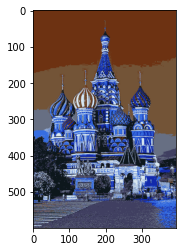

In [26]:
plt.imshow(new_img)
plt.show()

In [27]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            #The zip() function returns an 
            #iterator of tuples based on the iterable objects
            # plot the relative percentage of each cluster
            #zip() returns an iterator of 
            #tuples with each tuple having only one element.
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar

In [28]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

(hist, _) = np.histogram(km.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()
       

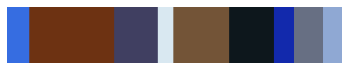

In [29]:
bar = plot_colors(hist, km.cluster_centers_)
# show our color bart
plt.imshow(img)
plt.axis("off")
plt.imshow(bar)
plt.show()

# Visualizing First Image through K-Means sklearn

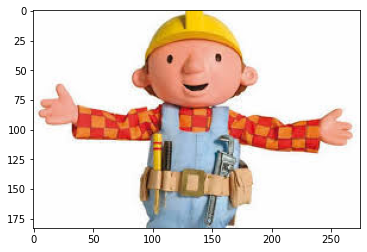

In [31]:
img=cv2.imread("bob.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [32]:
img.shape

(183, 275, 3)

In [33]:
all_pixels=img.reshape((-1,3)) 

In [35]:
from sklearn.cluster import KMeans
k=9
km=KMeans(n_clusters=k)
#so it will take color from cluster and find color 
km.fit(all_pixels)
km.cluster_centers_ #center we have in decimal 
#so rgb(14.91798497,  17.94468754,  13.52473915)<== are some color as these ar some dominant points

array([[253.32836154, 253.28163942, 252.93074545],
       [152.9406657 , 109.77568741,  68.71128799],
       [234.74392809, 169.70147256, 142.4065787 ],
       [119.85037594, 134.60451128, 143.20075188],
       [230.52678571, 181.59172078,  17.81818182],
       [203.60423077,  51.155     ,  34.61230769],
       [ 80.39263804,  50.34560327,  37.4601227 ],
       [219.70497095, 121.5755326 ,  68.4360878 ],
       [161.62729913, 187.36915134, 209.52662149]])

In [37]:
centers=np.array(km.cluster_centers_,dtype="uint") #so changing it in integers
#centers==>color
centers

array([[253, 253, 252],
       [152, 109,  68],
       [234, 169, 142],
       [119, 134, 143],
       [230, 181,  17],
       [203,  51,  34],
       [ 80,  50,  37],
       [219, 121,  68],
       [161, 187, 209]], dtype=uint32)

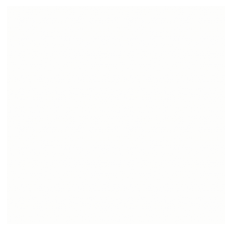

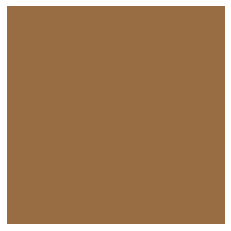

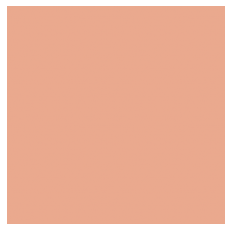

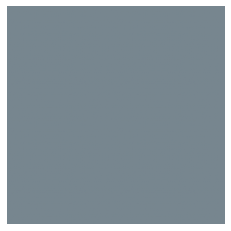

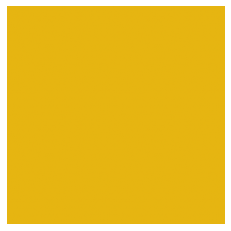

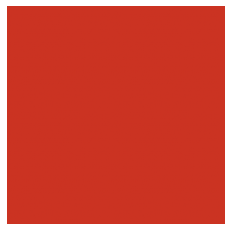

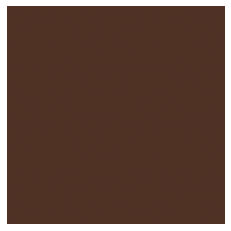

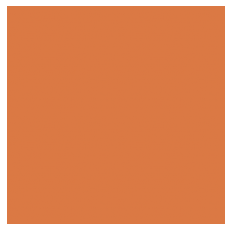

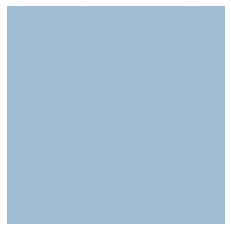

In [38]:
for c in centers:
    a=np.zeros((100,100,3)) #image 
    a[:,:,:]=c #so image will broadcast into a of the cluster center from img
    
    plt.imshow(a/255) #a should be in 0 and 1
    plt.axis("off") #removing axis 
    plt.show()

In [39]:
km.labels_#it will give cluster number associated with a cluster
km.labels_.shape #showing number of cluster 

(50325,)

In [40]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")
new_img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint32)

In [41]:
new_img.shape
#you have same shape of image eariler of Pixels

(50325, 3)

In [42]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
#in this we are iterating over all the points of image alloting all the color we have to new image
#colors are in center 

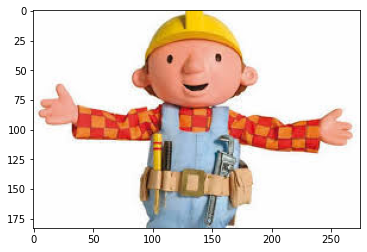

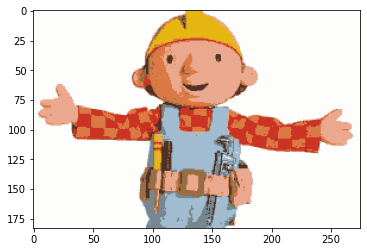

In [43]:
new_img = new_img.reshape((183, 275,3))
plt.imshow(img)
plt.show()
plt.imshow(new_img)
plt.show()

# DBSCAN 
as kmeans can only separate structured data not unstructered data